<a href="https://colab.research.google.com/github/pavananisetti/hospital-resource-burn-rate-prediction/blob/main/Hospital_burn_rate_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EXPLORATORY DATA ANALYSIS

In [31]:
import pandas as pd

In [ ]:
data = pd.read_csv(r"/content/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_20250724.csv" )

/tmp/ipython-input-2422233903.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"/content/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_20250724.csv" )


In [ ]:
data.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum,staffed_icu_pediatric_patients_confirmed_covid_7_day_avg,staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage,staffed_icu_pediatric_patients_confirmed_covid_7_day_sum,staffed_pediatric_icu_bed_occupancy_7_day_avg,staffed_pediatric_icu_bed_occupancy_7_day_coverage,staffed_pediatric_icu_bed_occupancy_7_day_sum,total_staffed_pediatric_icu_beds_7_day_avg,total_staffed_pediatric_icu_beds_7_day_coverage,total_staffed_pediatric_icu_beds_7_day_sum
0,370094,2021/01/10,OK,370094,SSM HEALTH ST ANTHONY HOSPITAL - MIDWEST,2825 PARKLAWN DRIVE,MIDWEST CITY,73110.0,Short Term,40109.0,...,NaN,NaN,0.0,NaN,0.0,3.0,0.0,0.0,3.0,0.0
1,370220,2020/06/14,OK,370220,ONECORE HEALTH,100 NE 85TH STREET,OKLAHOMA CITY,73114.0,Short Term,40109.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
2,431338,2022/12/25,SD,431338,AVERA GREGORY HOSPITAL,110 S LOGAN AVE,GREGORY,57533.0,Critical Access Hospitals,46053.0,...,0.0,0.0,7.0,0.0,0.0,7.0,0.0,0.0,7.0,0.0
3,450424,2020/10/18,TX,450424,HOUSTON METHODIST BAYTOWN HOSPITAL,4401 GARTH ROAD,BAYTOWN,77521.0,Short Term,48201.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4,453316,2020/08/02,TX,453316,CHILDRENS MEDICAL CENTER PLANO,7601 PRESTON ROAD,PLANO,75024.0,Childrens Hospitals,48085.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [ ]:
data.columns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 100)


print(data.shape)
print(data.columns.tolist())
print(data.head(3))

(122203, 128)
['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name', 'address', 'city', 'zip', 'hospital_subtype', 'fips_code', 'is_metro_micro', 'total_beds_7_day_avg', 'all_adult_hospital_beds_7_day_avg', 'all_adult_hospital_inpatient_beds_7_day_avg', 'inpatient_beds_used_7_day_avg', 'all_adult_hospital_inpatient_bed_occupied_7_day_avg', 'inpatient_beds_used_covid_7_day_avg', 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg', 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg', 'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg', 'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg', 'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg', 'staffed_adult_icu_bed_occupancy_7_day_avg', 'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg', 'staffed_icu_adult_patients_confirmed_covid_7_day_avg', 'total_patients_hospit

In [ ]:
data.info

<bound method DataFrame.info of        hospital_pk collection_week state     ccn                                     hospital_name                     address           city      zip           hospital_subtype  fips_code  is_metro_micro  total_beds_7_day_avg  all_adult_hospital_beds_7_day_avg  all_adult_hospital_inpatient_beds_7_day_avg  inpatient_beds_used_7_day_avg  all_adult_hospital_inpatient_bed_occupied_7_day_avg  inpatient_beds_used_covid_7_day_avg  total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg  total_adult_patients_hospitalized_confirmed_covid_7_day_avg  total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg  total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg  inpatient_beds_7_day_avg  total_icu_beds_7_day_avg  total_staffed_adult_icu_beds_7_day_avg  icu_beds_used_7_day_avg  staffed_adult_icu_bed_occupancy_7_day_avg  staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg  staffed_icu_adult_patients_confirmed_covid_7_day_avg  \
0           370094      2021/01/10    OK  370094          SSM HEALTH ST ANTHONY HOSPITAL - MIDWEST         2825 PARKLAWN DRIVE   MIDWEST CITY  73110.0                 Short Term    40109.0            True                 209.0                               88.6                                         88.6                           85.1                                               72.7                                   20.0                                               20.0                                                                       20.0                                                          0.0                                                                            0.0                                    88.6                       9.0                                     9.0                      8.9                                        8.9                                                5.4                                                                 5.4      
1           370220      2020/06/14    OK  370220                                    ONECORE HEALTH          100 NE 85TH STREET  OKLAHOMA CITY  73114.0                 Short Term    40109.0            True                   8.0                                NaN                                          NaN                            4.0                                                NaN                                    0.0                                                0.0                                                                        0.0                                                          NaN                                                                            NaN                                     8.0                       0.0                                     NaN                      NaN                                        NaN                                                NaN                                                                 NaN      
2           431338      2022/12/25    SD  431338                            AVERA GREGORY HOSPITAL             110 S LOGAN AVE        GREGORY  57533.0  Critical Access Hospitals    46053.0           False                   NaN                                NaN                                         11.0                      -999999.0                                          -999999.0                              -999999.0                                          -999999.0                                                                  -999999.0                                                          0.0                                                                            0.0                                    11.0                 -999999.0                               -999999.0                      0.0                                        0.0                                                0.0                                                                 0.0   

BASIC STATS

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("DATA TYPES:")
print(data.dtypes)
print("\n" + "="*50)


print("MISSING VALUES:")
print(data.isnull().sum())
print("\n" + "="*50)


print("BASIC STATISTICS:")
print(data.describe())
print("\n" + "="*50)



DATA TYPES:
hospital_pk                                            object
collection_week                                        object
state                                                  object
ccn                                                    object
hospital_name                                          object
                                                       ...   
staffed_pediatric_icu_bed_occupancy_7_day_coverage    float64
staffed_pediatric_icu_bed_occupancy_7_day_sum         float64
total_staffed_pediatric_icu_beds_7_day_avg            float64
total_staffed_pediatric_icu_beds_7_day_coverage       float64
total_staffed_pediatric_icu_beds_7_day_sum            float64
Length: 128, dtype: object

MISSING VALUES:
hospital_pk                                               0
collection_week                                           0
state                                                     0
ccn                                                     173
hospital_name         

Unique values in categorical columns

In [ ]:

print("UNIQUE VALUES:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(f"Values: {data[col].unique()[:10]}")
    print()

UNIQUE VALUES:
hospital_pk: 5131 unique values
Values: ['370094' '370220' '431338' '450424' '453316' '450801' '440053' '371303'
 '460006' '390156']

collection_week: 224 unique values
Values: ['2021/01/10' '2020/06/14' '2022/12/25' '2020/10/18' '2020/08/02'
 '2023/06/11' '2023/08/20' '2022/10/30' '2022/01/30' '2022/03/06']

state: 56 unique values
Values: ['OK' 'SD' 'TX' 'TN' 'UT' 'PA' 'AL' 'PR' 'RI' 'OR']

ccn: 5105 unique values
Values: ['370094' '370220' '431338' '450424' '453316' '450801' '440053' '371303'
 '460006' '390156']

hospital_name: 4981 unique values
Values: ['SSM HEALTH ST ANTHONY HOSPITAL - MIDWEST' 'ONECORE HEALTH'
 'AVERA GREGORY HOSPITAL' 'HOUSTON METHODIST BAYTOWN HOSPITAL'
 'CHILDRENS MEDICAL CENTER PLANO' 'CHRISTUS ST MICHAEL HEALTH SYSTEM'
 'ASCENSION SAINT THOMAS RUTHERFORD HOSPITAL'
 'ROGER MILLS MEMORIAL HOSPITAL' 'LDS HOSPITAL'
 'MERCY CATHOLIC MEDICAL CENTER- MERCY FITZGERALD']

address: 5048 unique values
Values: ['2825 PARKLAWN DRIVE' '100 NE 85TH STREET' 

CHECKING NULL VALUES

In [ ]:
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(data) * 100).round(2)


missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0]

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    print(f"\nTotal columns with missing values: {len(missing_df)}")
    print(f"Columns with highest missing values:")
    for i, row in missing_df.head(5).iterrows():
        print(f"  {row['Column']}: {row['Missing_Count']} ({row['Missing_Percentage']}%)")
else:
    print("No missing values found!")

print("\n" + "="*50)

                                                                       Column  Missing_Count  Missing_Percentage
                            total_personnel_covid_vaccinated_doses_none_7_day          85971               70.35
                             total_personnel_covid_vaccinated_doses_one_7_day          85912               70.30
                             total_personnel_covid_vaccinated_doses_all_7_day          85900               70.29
                      previous_week_patients_covid_vaccinated_doses_all_7_day          85703               70.13
                      previous_week_patients_covid_vaccinated_doses_one_7_day          85693               70.12
            previous_week_personnel_covid_vaccinated_doses_administered_7_day          85601               70.05
          total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg          60983               49.90
          total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum          60983    

CHECKING NEGATIVE VALUES

In [ ]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
negative_counts = (data[numeric_cols] < 0).sum()
if negative_counts.sum() > 0:
    print(f"Negative values found:")
    print(negative_counts[negative_counts > 0])
else:
    print("No negative values found")

Negative values found:
total_beds_7_day_avg                                                               112
all_adult_hospital_beds_7_day_avg                                                  182
all_adult_hospital_inpatient_beds_7_day_avg                                        586
inpatient_beds_used_7_day_avg                                                     9852
all_adult_hospital_inpatient_bed_occupied_7_day_avg                               9584
inpatient_beds_used_covid_7_day_avg                                              36831
total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg        34666
total_adult_patients_hospitalized_confirmed_covid_7_day_avg                      40602
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg    11524
total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg                   9210
inpatient_beds_7_day_avg                                                           446
total_icu_beds_7_day

CHECKING DUPLICATE ROWS

In [ ]:

print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


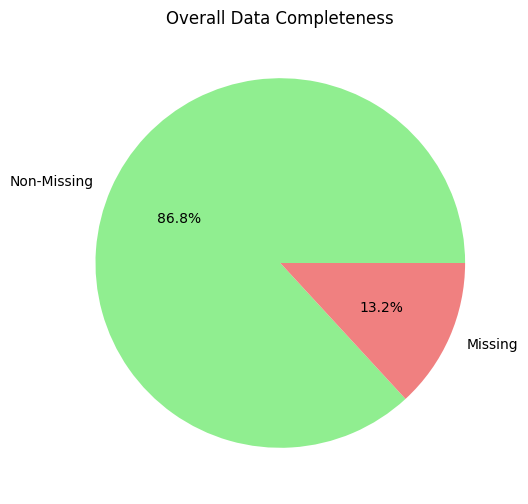

In [ ]:
total_cells = data.shape[0] * data.shape[1]
missing_cells = data.isnull().sum().sum()
non_missing_cells = total_cells - missing_cells

plt.figure(figsize=(8, 6))
plt.pie([non_missing_cells, missing_cells],
        labels=['Non-Missing', 'Missing'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'lightcoral'])
plt.title('Overall Data Completeness')
plt.show()

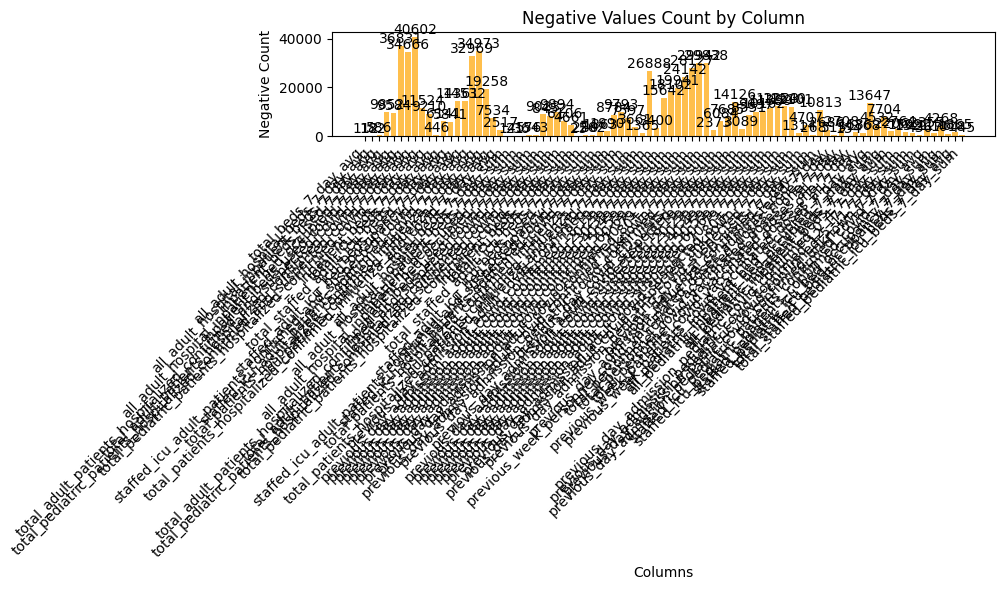

In [ ]:
if negative_counts.sum() > 0:
    negative_df = negative_counts[negative_counts > 0]
    plt.figure(figsize=(10, 6))
    plt.bar(negative_df.index, negative_df.values, color='orange', alpha=0.7)
    plt.title('Negative Values Count by Column')
    plt.xlabel('Columns')
    plt.ylabel('Negative Count')
    plt.xticks(rotation=45, ha='right')
    for i, v in enumerate(negative_df.values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

In [ ]:
data.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name', 'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       ...
       'previous_day_admission_pediatric_covid_confirmed_unknown_7_day_sum', 'staffed_icu_pediatric_patients_confirmed_covid_7_day_avg', 'staffed_icu_pediatric_patients_confirmed_covid_7_day_coverage', 'staffed_icu_pediatric_patients_confirmed_covid_7_day_sum', 'staffed_pediatric_icu_bed_occupancy_7_day_avg', 'staffed_pediatric_icu_bed_occupancy_7_day_coverage', 'staffed_pediatric_icu_bed_occupancy_7_day_sum', 'total_staffed_pediatric_icu_beds_7_day_avg', 'total_staffed_pediatric_icu_beds_7_day_coverage', 'total_staffed_pediatric_icu_beds_7_day_sum'], dtype='object', length=128)

In [ ]:
features = [col.strip() for col in data.columns if col.strip() != ""]



with open("features.txt", "w") as f:
    for feature in features:
        f.write(f"{feature}\n")

print("✅ Features saved to features.txt")

✅ Features saved to features.txt


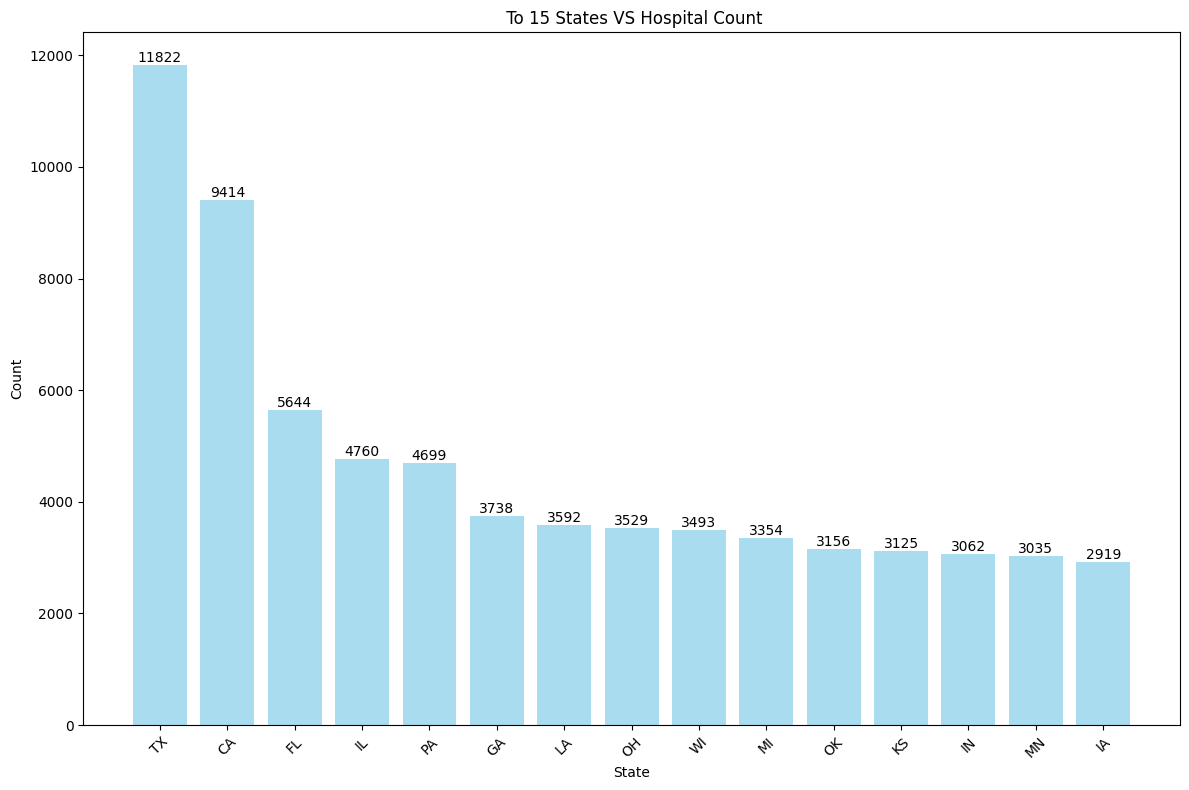

In [ ]:
state_counts = data['state'].value_counts().head(15)
plt.figure(figsize=(12, 8))
plt.bar(state_counts.index, state_counts.values, color='skyblue', alpha=0.7)
plt.title(' To 15 States VS Hospital Count')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)

for i, v in enumerate(state_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [ ]:
print(data['state'].value_counts())

state
TX    11822
CA     9414
FL     5644
IL     4760
PA     4699
GA     3738
LA     3592
OH     3529
WI     3493
MI     3354
OK     3156
KS     3125
IN     3062
MN     3035
IA     2919
NY     2916
TN     2853
AL     2638
WA     2454
KY     2397
CO     2337
VA     2334
MS     2199
AR     2165
NC     2002
MO     1961
AZ     1891
MA     1838
SC     1768
NE     1676
SD     1562
OR     1553
PR     1391
WV     1371
UT     1317
MD     1265
NJ     1252
ID     1217
MT     1068
CT      903
ME      847
ND      786
NV      732
WY      693
NM      685
HI      665
NH      473
VT      392
AK      389
RI      278
DC      261
DE      193
VI       54
GU       49
AS       18
MP       18
Name: count, dtype: int64


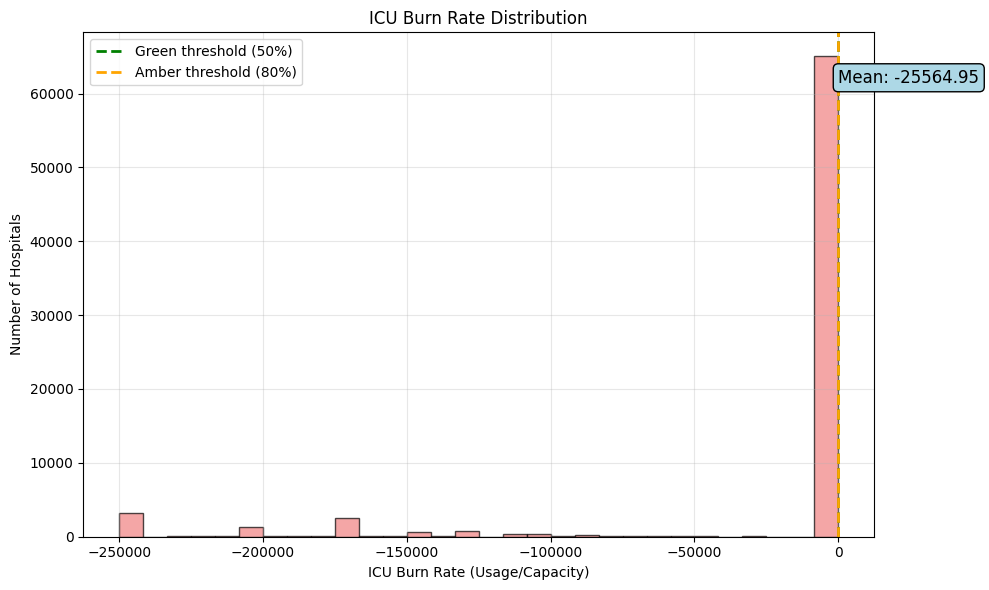

Mean ICU Burn Rate: -25564.951
High utilization (>80%): 28918 hospitals


In [ ]:
data['icu_burn_rate'] = data['icu_beds_used_7_day_avg'] / data['total_icu_beds_7_day_avg']
data['icu_burn_rate'] = data['icu_burn_rate'].replace([np.inf, -np.inf], np.nan)


plt.figure(figsize=(10, 6))
plt.hist(data['icu_burn_rate'].dropna(), bins=30, color='lightcoral', alpha=0.7, edgecolor='black')
plt.axvline(0.5, color='green', linestyle='--', linewidth=2, label='Green threshold (50%)')
plt.axvline(0.8, color='orange', linestyle='--', linewidth=2, label='Amber threshold (80%)')
plt.title('ICU Burn Rate Distribution')
plt.xlabel('ICU Burn Rate (Usage/Capacity)')
plt.ylabel('Number of Hospitals')
plt.legend()
plt.grid(True, alpha=0.3)

mean_rate = data['icu_burn_rate'].mean()
plt.text(0.02, plt.ylim()[1]*0.9, f'Mean: {mean_rate:.2f}', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

print(f"Mean ICU Burn Rate: {mean_rate:.3f}")
print(f"High utilization (>80%): {(data['icu_burn_rate'] > 0.8).sum()} hospitals")

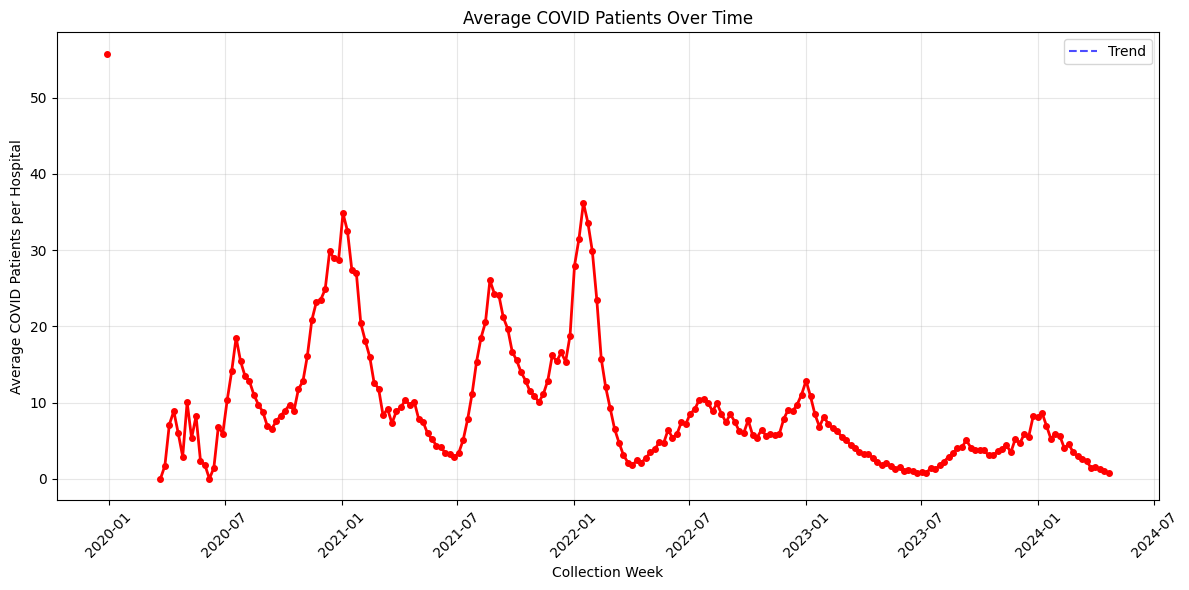

Peak COVID patients: 55.8
Lowest COVID patients: 0.0


In [ ]:
data['collection_week'] = pd.to_datetime(data['collection_week'])
data = data.replace(-999999, np.nan)


covid_timeline = data.groupby('collection_week')['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'].mean()

plt.figure(figsize=(12, 6))
plt.plot(covid_timeline.index, covid_timeline.values, color='red', linewidth=2, marker='o', markersize=4)
plt.title('Average COVID Patients Over Time')
plt.xlabel('Collection Week')
plt.ylabel('Average COVID Patients per Hospital')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

z = np.polyfit(range(len(covid_timeline)), covid_timeline.values, 1)
p = np.poly1d(z)
plt.plot(covid_timeline.index, p(range(len(covid_timeline))), "--", color='blue', alpha=0.7, label='Trend')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Peak COVID patients: {covid_timeline.max():.1f}")
print(f"Lowest COVID patients: {covid_timeline.min():.1f}")

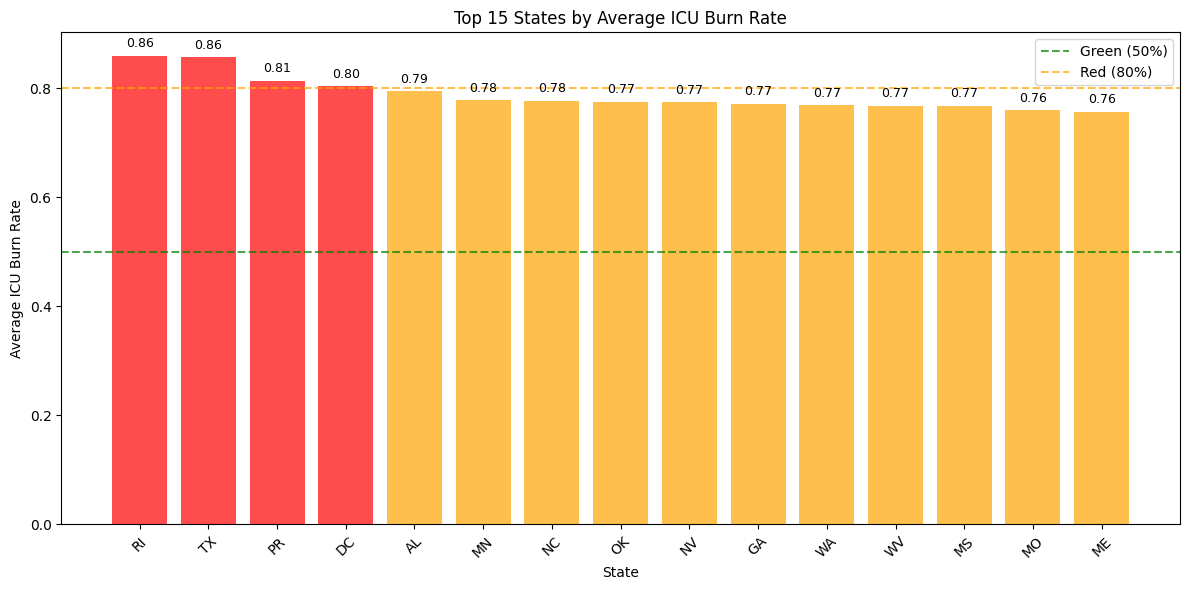

States with highest burn rates:
state
RI    0.859300
TX    0.856521
PR    0.813753
DC    0.803032
AL    0.793812
Name: icu_burn_rate, dtype: float64


In [ ]:
data['icu_burn_rate'] = data['icu_beds_used_7_day_avg'] / data['total_icu_beds_7_day_avg']
data['icu_burn_rate'] = data['icu_burn_rate'].replace([np.inf, -np.inf], np.nan)


state_burn_rate = data.groupby('state')['icu_burn_rate'].mean().sort_values(ascending=False).head(15)


plt.figure(figsize=(12, 6))
colors = ['red' if x > 0.8 else 'orange' if x > 0.5 else 'green' for x in state_burn_rate.values]
bars = plt.bar(state_burn_rate.index, state_burn_rate.values, color=colors, alpha=0.7)

plt.title('Top 15 States by Average ICU Burn Rate')
plt.xlabel('State')
plt.ylabel('Average ICU Burn Rate')
plt.xticks(rotation=45)


plt.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Green (50%)')
plt.axhline(y=0.8, color='orange', linestyle='--', alpha=0.7, label='Red (80%)')


for bar, value in zip(bars, state_burn_rate.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

print("States with highest burn rates:")
print(state_burn_rate.head())

Hospitals with >90% ICU utilization: 14132


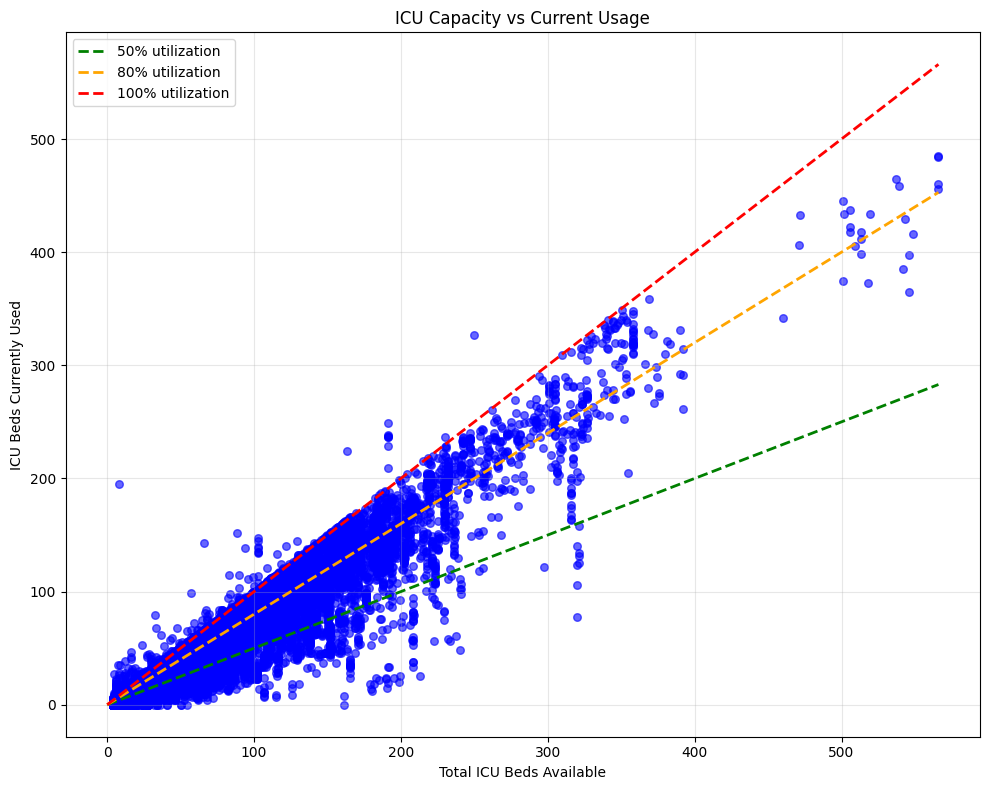

In [ ]:
df_clean = data[(data['total_icu_beds_7_day_avg'] < 10000) &
              (data['icu_beds_used_7_day_avg'] < 10000) &
              (data['total_icu_beds_7_day_avg'] > 0)]

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_clean['total_icu_beds_7_day_avg'],
           df_clean['icu_beds_used_7_day_avg'],
           alpha=0.6, s=30, color='blue')

# Add diagonal lines for utilization rates
max_beds = df_clean['total_icu_beds_7_day_avg'].max()
x_line = np.linspace(0, max_beds, 100)

plt.plot(x_line, x_line * 0.5, '--', color='green', label='50% utilization', linewidth=2)
plt.plot(x_line, x_line * 0.8, '--', color='orange', label='80% utilization', linewidth=2)
plt.plot(x_line, x_line * 1.0, '--', color='red', label='100% utilization', linewidth=2)

plt.title('ICU Capacity vs Current Usage')
plt.xlabel('Total ICU Beds Available')
plt.ylabel('ICU Beds Currently Used')
plt.legend()
plt.grid(True, alpha=0.3)

# Add annotations
high_util = df_clean[df_clean['icu_beds_used_7_day_avg'] / df_clean['total_icu_beds_7_day_avg'] > 0.9]
print(f"Hospitals with >90% ICU utilization: {len(high_util)}")

plt.tight_layout()
plt.show()

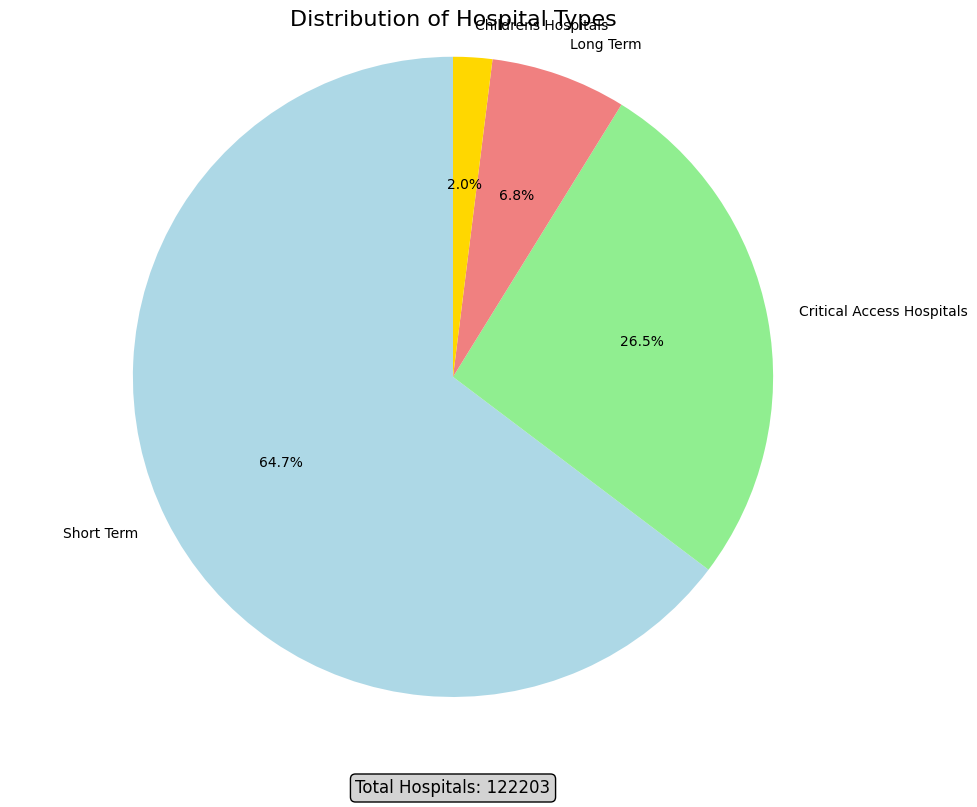

Hospital Type Breakdown:
Short Term: 79077 (64.7%)
Critical Access Hospitals: 32348 (26.5%)
Long Term: 8369 (6.8%)
Childrens Hospitals: 2409 (2.0%)


In [ ]:
hospital_types = data['hospital_subtype'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink']
plt.pie(hospital_types.values, labels=hospital_types.index, autopct='%1.1f%%',
        colors=colors, startangle=90)

plt.title('Distribution of Hospital Types', fontsize=16)
plt.axis('equal')

# Add total count
total_hospitals = len(data)
plt.text(0, -1.3, f'Total Hospitals: {total_hospitals}',
         ha='center', fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))

plt.tight_layout()
plt.show()

print("Hospital Type Breakdown:")
for htype, count in hospital_types.items():
    print(f"{htype}: {count} ({count/total_hospitals*100:.1f}%)")

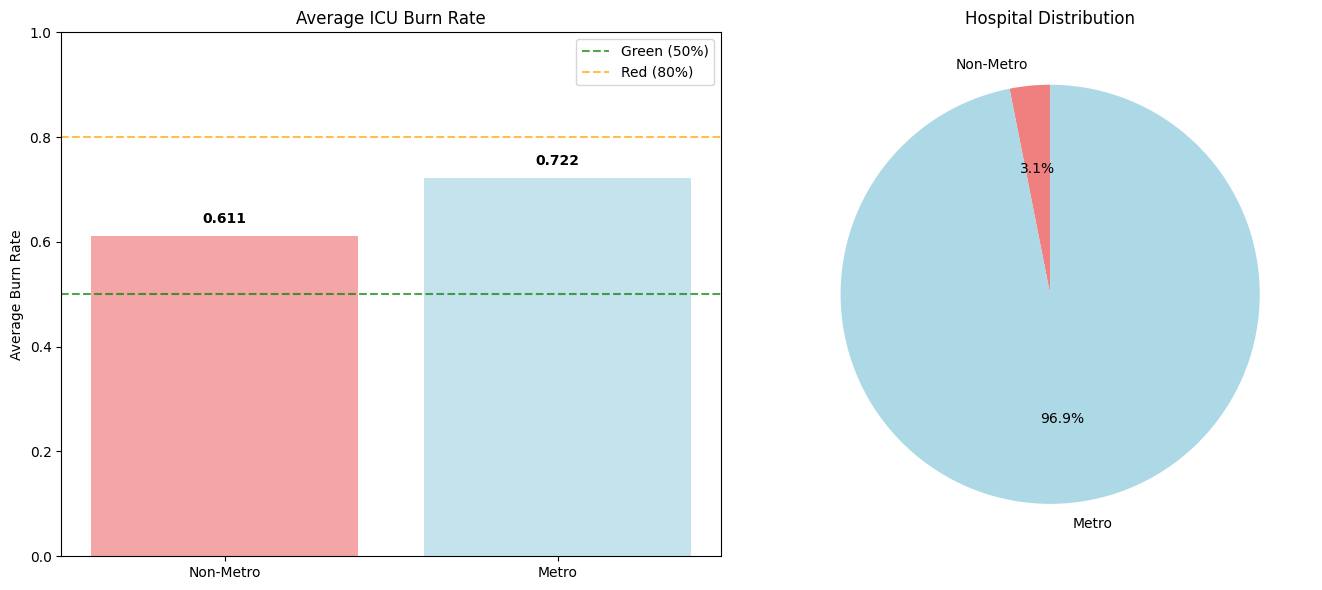

Metro vs Non-Metro Analysis:
                 mean  count    std
is_metro_micro                     
False           0.611   1840  0.348
True            0.722  57414  0.250


In [ ]:
data['icu_burn_rate'] = data['icu_beds_used_7_day_avg'] / data['total_icu_beds_7_day_avg']
data['icu_burn_rate'] = data['icu_burn_rate'].replace([np.inf, -np.inf], np.nan)

# Group by metro/non-metro
metro_comparison = data.groupby('is_metro_micro')['icu_burn_rate'].agg(['mean', 'count', 'std']).round(3)

# Create side-by-side bar chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for average burn rate
metro_labels = ['Non-Metro', 'Metro']
ax1.bar(metro_labels, metro_comparison['mean'],
        color=['lightcoral', 'lightblue'], alpha=0.7)
ax1.set_title('Average ICU Burn Rate')
ax1.set_ylabel('Average Burn Rate')
ax1.set_ylim(0, 1)

# Add value labels
for i, v in enumerate(metro_comparison['mean']):
    ax1.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Add threshold lines
ax1.axhline(y=0.5, color='green', linestyle='--', alpha=0.7, label='Green (50%)')
ax1.axhline(y=0.8, color='orange', linestyle='--', alpha=0.7, label='Red (80%)')
ax1.legend()

# Pie chart for hospital count
ax2.pie(metro_comparison['count'], labels=metro_labels, autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'], startangle=90)
ax2.set_title('Hospital Distribution')

plt.tight_layout()
plt.show()

print("Metro vs Non-Metro Analysis:")
print(metro_comparison)

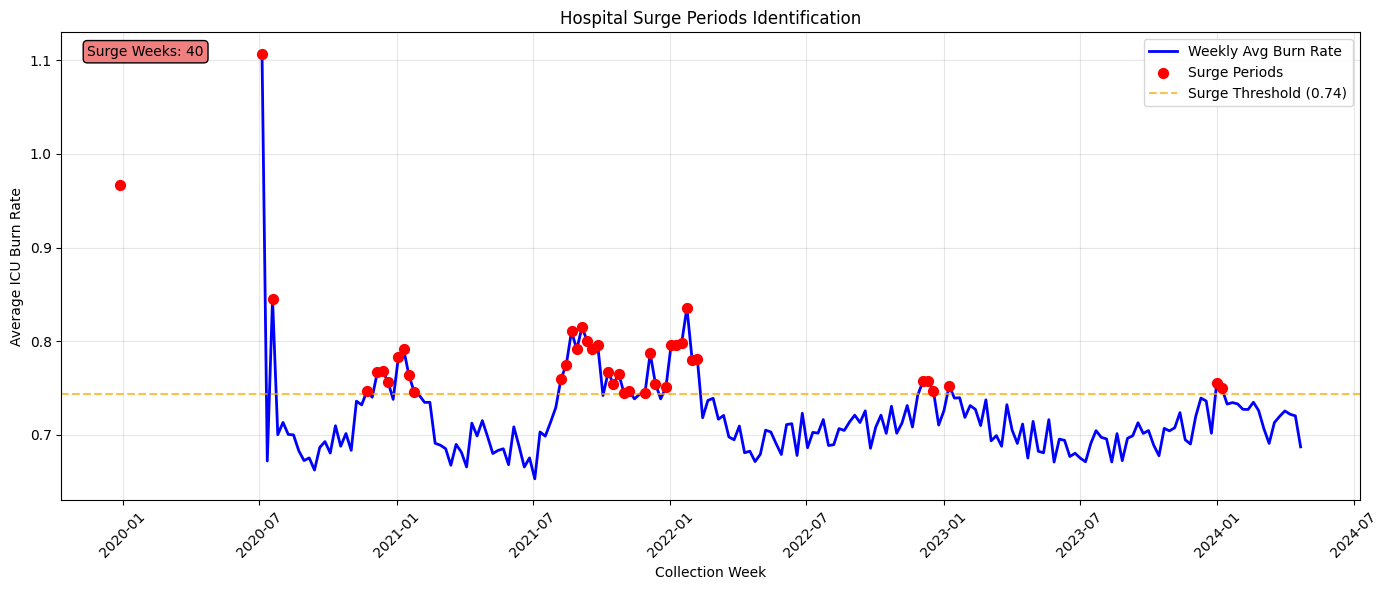

In [ ]:


weekly_burn_rate = data.groupby('collection_week')['icu_burn_rate'].mean()
surge_threshold = weekly_burn_rate.quantile(0.8)

plt.figure(figsize=(14, 6))
plt.plot(weekly_burn_rate.index, weekly_burn_rate.values,
         color='blue', linewidth=2, label='Weekly Avg Burn Rate')


surge_periods = weekly_burn_rate[weekly_burn_rate > surge_threshold]
plt.scatter(surge_periods.index, surge_periods.values,
           color='red', s=50, zorder=5, label='Surge Periods')

plt.axhline(y=surge_threshold, color='orange', linestyle='--',
           alpha=0.7, label=f'Surge Threshold ({surge_threshold:.2f})')

plt.title('Hospital Surge Periods Identification')
plt.xlabel('Collection Week')
plt.ylabel('Average ICU Burn Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Add surge period count
surge_weeks = len(surge_periods)
plt.text(0.02, 0.95, f'Surge Weeks: {surge_weeks}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))

plt.tight_layout()
plt.show()

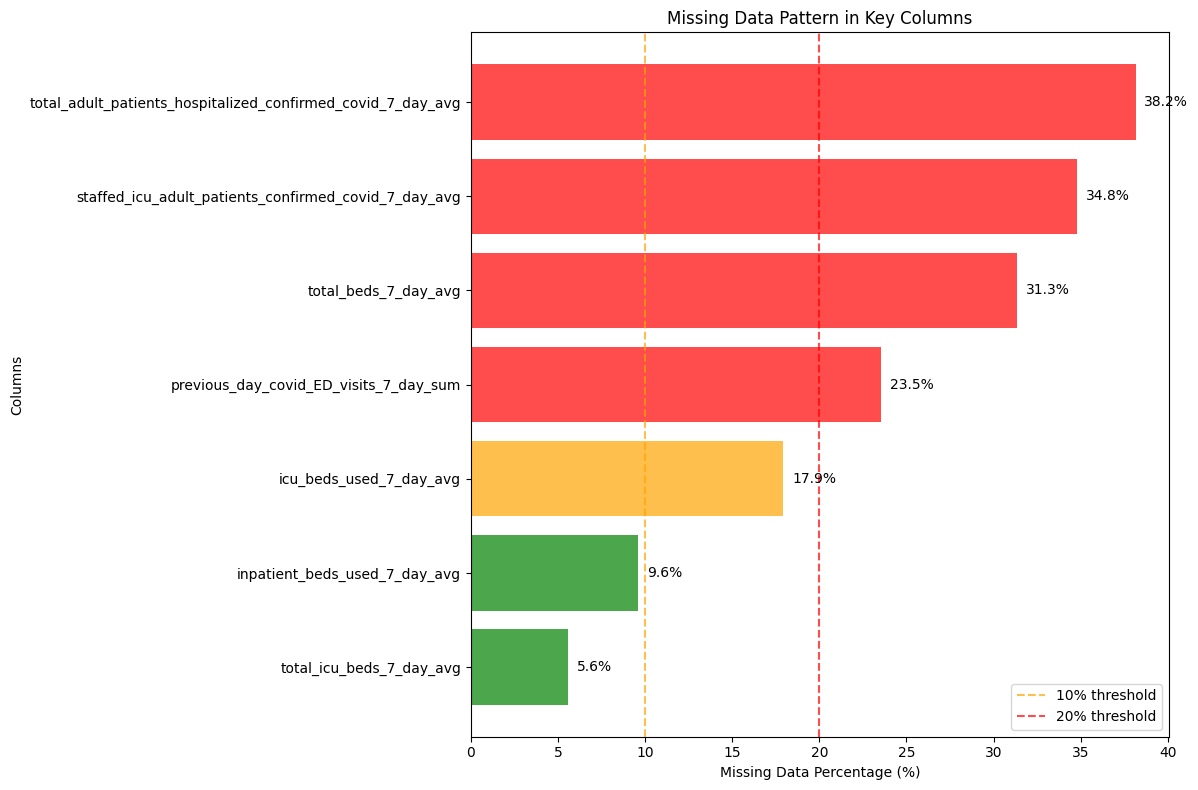

Missing Data Summary:
total_icu_beds_7_day_avg: 5.6%
inpatient_beds_used_7_day_avg: 9.6%
icu_beds_used_7_day_avg: 17.9%
previous_day_covid_ED_visits_7_day_sum: 23.5%
total_beds_7_day_avg: 31.3%
staffed_icu_adult_patients_confirmed_covid_7_day_avg: 34.8%
total_adult_patients_hospitalized_confirmed_covid_7_day_avg: 38.2%


In [ ]:
key_columns = [
    'total_icu_beds_7_day_avg',
    'icu_beds_used_7_day_avg',
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
    'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
    'inpatient_beds_used_7_day_avg',
    'previous_day_covid_ED_visits_7_day_sum',
    'total_beds_7_day_avg'
]

# Include -999999 as missing
missing_data = []
for col in key_columns:
    if col in data.columns:
        total_missing = data[col].isnull().sum() + (data[col] == -999999).sum()
        missing_pct = (total_missing / len(data)) * 100
        missing_data.append({'Column': col, 'Missing_Pct': missing_pct})

missing_df = pd.DataFrame(missing_data).sort_values('Missing_Pct', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
colors = ['red' if x > 20 else 'orange' if x > 10 else 'green' for x in missing_df['Missing_Pct']]
bars = plt.barh(missing_df['Column'], missing_df['Missing_Pct'], color=colors, alpha=0.7)

plt.title('Missing Data Pattern in Key Columns')
plt.xlabel('Missing Data Percentage (%)')
plt.ylabel('Columns')

# Add percentage labels
for bar, pct in zip(bars, missing_df['Missing_Pct']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{pct:.1f}%', va='center', fontsize=10)

# Add threshold lines
plt.axvline(x=10, color='orange', linestyle='--', alpha=0.7, label='10% threshold')
plt.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='20% threshold')

plt.legend()
plt.tight_layout()
plt.show()

print("Missing Data Summary:")
for _, row in missing_df.iterrows():
    print(f"{row['Column']}: {row['Missing_Pct']:.1f}%")

In [ ]:
df= data.copy()

DROPPING COLUMN WITH 50% MISSING VALUE

In [ ]:
df['collection_week'] = pd.to_datetime(df['collection_week'])

print("\nStep 1: Dropping columns with >50% missing values...")

missing_analysis = df.isnull().sum()
missing_percent = (missing_analysis / len(df)) * 100

# Also count -999999 as missing
for col in df.select_dtypes(include=[np.number]).columns:
    missing_999_count = (df[col] == -999999).sum()
    total_missing = missing_analysis[col] + missing_999_count
    missing_percent[col] = (total_missing / len(df)) * 100

columns_to_drop = missing_percent[missing_percent > 50].index.tolist()
print(f"Dropping {len(columns_to_drop)} columns with >50% missing:")
for col in columns_to_drop:
    print(f"  - {col}: {missing_percent[col]:.1f}%")

df_cleaned = df.drop(columns=columns_to_drop)
print(f"Shape after dropping high missing columns: {df_cleaned.shape}")


Step 1: Dropping columns with >50% missing values...
Dropping 9 columns with >50% missing:
  - total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg: 52.0%
  - total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum: 51.0%
  - previous_week_personnel_covid_vaccinated_doses_administered_7_day: 72.2%
  - total_personnel_covid_vaccinated_doses_none_7_day: 70.8%
  - total_personnel_covid_vaccinated_doses_one_7_day: 72.5%
  - total_personnel_covid_vaccinated_doses_all_7_day: 70.4%
  - previous_week_patients_covid_vaccinated_doses_one_7_day: 71.5%
  - previous_week_patients_covid_vaccinated_doses_all_7_day: 71.3%
  - icu_burn_rate: 51.5%
Shape after dropping high missing columns: (122203, 120)


In [ ]:
print("\nStep 2: Replacing -999999 with NaN...")
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].replace(-999999, np.nan)

# Step 3: Handle negative values (clip to 0 for counts/rates)
print("\nStep 3: Handling negative values...")
count_columns = [col for col in numeric_cols if any(word in col.lower()
                for word in ['beds', 'patients', 'visits', 'admission', 'sum', 'avg'])]

negative_fixed = 0
for col in count_columns:
    if col in df_cleaned.columns:
        negative_count = (df_cleaned[col] < 0).sum()
        if negative_count > 0:
            df_cleaned[col] = df_cleaned[col].clip(lower=0)
            negative_fixed += negative_count
            print(f"  Fixed {negative_count} negative values in {col}")

print(f"Total negative values fixed: {negative_fixed}")


Step 2: Replacing -999999 with NaN...

Step 3: Handling negative values...
  Fixed 2 negative values in previous_day_admission_pediatric_covid_suspected_7_day_sum
Total negative values fixed: 2


In [ ]:
from sklearn.impute import SimpleImputer
def identify_column_types(df):
    categorical_cols = []
    boolean_cols = []
    numeric_cols = []
    text_cols = []

    for col in df.columns:
        if col in ['collection_week', 'hospital_pk', 'ccn']:
            continue  # Skip ID and date columns

        dtype = df[col].dtype
        unique_count = df[col].nunique()

        if dtype == 'bool' or (dtype == 'object' and unique_count <= 2):
            boolean_cols.append(col)
        elif dtype == 'object' or (dtype == 'category'):
            if unique_count <= 50:  # Reasonable number of categories
                categorical_cols.append(col)
            else:
                text_cols.append(col)
        elif np.issubdtype(dtype, np.number):
            numeric_cols.append(col)

    return categorical_cols, boolean_cols, numeric_cols, text_cols

categorical_cols, boolean_cols, numeric_cols, text_cols = identify_column_types(df_cleaned)

print(f"Categorical columns: {len(categorical_cols)}")
print(f"Boolean columns: {len(boolean_cols)}")
print(f"Numeric columns: {len(numeric_cols)}")
print(f"Text columns: {len(text_cols)}")

# 1. Handle Boolean columns
print(f"\n1. Imputing {len(boolean_cols)} boolean columns...")
for col in boolean_cols:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        # Use most frequent value for boolean
        mode_val = df_cleaned[col].mode()
        fill_val = mode_val[0] if len(mode_val) > 0 else True
        before_count = df_cleaned[col].isnull().sum()
        df_cleaned[col] = df_cleaned[col].fillna(fill_val)
        print(f"  {col}: filled {before_count} values with {fill_val}")

# 2. Handle Categorical columns
print(f"\n2. Imputing {len(categorical_cols)} categorical columns...")
for col in categorical_cols:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        # Use most frequent value
        mode_val = df_cleaned[col].mode()
        fill_val = mode_val[0] if len(mode_val) > 0 else 'Unknown'
        before_count = df_cleaned[col].isnull().sum()
        df_cleaned[col] = df_cleaned[col].fillna(fill_val)
        print(f"  {col}: filled {before_count} values with '{fill_val}'")

# 3. Handle Text columns
print(f"\n3. Imputing {len(text_cols)} text columns...")
for col in text_cols:
    if col in df_cleaned.columns and df_cleaned[col].isnull().any():
        before_count = df_cleaned[col].isnull().sum()
        df_cleaned[col] = df_cleaned[col].fillna('Unknown')
        print(f"  {col}: filled {before_count} values with 'Unknown'")

# 4. Handle Numeric columns with different strategies
print(f"\n4. Imputing {len(numeric_cols)} numeric columns...")

# Group numeric columns by type for better imputation
bed_cols = [col for col in numeric_cols if 'bed' in col.lower()]
patient_cols = [col for col in numeric_cols if 'patient' in col.lower()]
rate_cols = [col for col in numeric_cols if any(word in col.lower() for word in ['rate', 'percent', 'ratio'])]
count_cols = [col for col in numeric_cols if col not in bed_cols + patient_cols + rate_cols]

# Impute bed-related columns with median
if bed_cols:
    bed_imputer = SimpleImputer(strategy='median')
    bed_data = df_cleaned[bed_cols]
    imputed_bed_data = bed_imputer.fit_transform(bed_data)
    df_cleaned[bed_cols] = imputed_bed_data
    print(f"  Bed columns ({len(bed_cols)}): imputed with median")

# Impute patient columns with median
if patient_cols:
    patient_imputer = SimpleImputer(strategy='median')
    patient_data = df_cleaned[patient_cols]
    imputed_patient_data = patient_imputer.fit_transform(patient_data)
    df_cleaned[patient_cols] = imputed_patient_data
    print(f"  Patient columns ({len(patient_cols)}): imputed with median")

# Impute rate columns with mean (rates are usually normally distributed)
if rate_cols:
    rate_imputer = SimpleImputer(strategy='mean')
    rate_data = df_cleaned[rate_cols]
    imputed_rate_data = rate_imputer.fit_transform(rate_data)
    df_cleaned[rate_cols] = imputed_rate_data
    print(f"  Rate columns ({len(rate_cols)}): imputed with mean")

# Impute remaining numeric columns with median
if count_cols:
    count_imputer = SimpleImputer(strategy='median')
    count_data = df_cleaned[count_cols]
    imputed_count_data = count_imputer.fit_transform(count_data)
    df_cleaned[count_cols] = imputed_count_data
    print(f"  Count columns ({len(count_cols)}): imputed with median")

# FINAL VERIFICATION
print("\n" + "="*60)
print("FINAL IMPUTATION VERIFICATION")
print("="*60)

missing_after = df_cleaned.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print(f"Remaining missing values: {missing_after.sum()}")
print(f"Columns still with missing values: {len(remaining_missing)}")

if len(remaining_missing) > 0:
    print("\nColumns still with missing values:")
    for col, count in remaining_missing.items():
        pct = (count / len(df_cleaned)) * 100
        print(f"  {col:<50} {count:>6} ({pct:>5.1f}%)")

    # Force fill any remaining missing values
    print("\nForce filling remaining missing values...")
    for col in remaining_missing.index:
        if df_cleaned[col].dtype == 'object':
            df_cleaned[col] = df_cleaned[col].fillna('Unknown')
        else:
            df_cleaned[col] = df_cleaned[col].fillna(0)
else:
    print("✅ ALL MISSING VALUES SUCCESSFULLY IMPUTED!")

# Final check
final_missing = df_cleaned.isnull().sum().sum()
print(f"\nFinal missing value count: {final_missing}")

if final_missing == 0:
    print("🎉 IMPUTATION COMPLETE - NO MISSING VALUES REMAINING!")
else:
    print("⚠️  Some missing values still remain")

# Save fully imputed data
df_cleaned.to_csv('fully_imputed_hospital_data.csv', index=False)
print(f"\nFully imputed data saved as 'fully_imputed_hospital_data.csv'")
print(f"Final dataset shape: {df_cleaned.shape}")

# Show data types summary
print("\nFinal data types summary:")
print(df_cleaned.dtypes.value_counts())

Categorical columns: 1
Boolean columns: 2
Numeric columns: 108
Text columns: 6

1. Imputing 2 boolean columns...
  is_corrected: filled 1 values with False

2. Imputing 1 categorical columns...

3. Imputing 6 text columns...
  address: filled 54 values with 'Unknown'
  city: filled 54 values with 'Unknown'
  geocoded_hospital_address: filled 1 values with 'Unknown'
  hhs_ids: filled 1431 values with 'Unknown'

4. Imputing 108 numeric columns...


/tmp/ipython-input-4259451712.py:42: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[col] = df_cleaned[col].fillna(fill_val)


  Bed columns (45): imputed with median
  Patient columns (49): imputed with median
  Count columns (35): imputed with median

FINAL IMPUTATION VERIFICATION
Remaining missing values: 173
Columns still with missing values: 1

Columns still with missing values:
  ccn                                                   173 (  0.1%)

Force filling remaining missing values...

Final missing value count: 0
🎉 IMPUTATION COMPLETE - NO MISSING VALUES REMAINING!

Fully imputed data saved as 'fully_imputed_hospital_data.csv'
Final dataset shape: (122203, 120)

Final data types summary:
float64           108
object              9
bool                2
datetime64[ns]      1
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import warnings
warnings.filterwarnings('ignore')

print("Starting Feature Engineering with Proper Infinity Handling...")

# Load the imputed data
df_cleaned = pd.read_csv('fully_imputed_hospital_data.csv')
print(f"Loaded imputed data shape: {df_cleaned.shape}")

# Convert date back to datetime
df_cleaned['collection_week'] = pd.to_datetime(df_cleaned['collection_week'])

# Step 1: Calculate burn rates with proper handling of division by zero
print("\nStep 1: Calculating burn rates...")

def safe_divide(numerator, denominator, fill_value=0):
    """Safely divide two arrays, handling division by zero and infinity"""
    # Convert to numpy arrays
    num = np.array(numerator)
    den = np.array(denominator)

    # Create result array filled with fill_value
    result = np.full_like(num, fill_value, dtype=float)

    # Only divide where denominator is not zero
    mask = (den != 0) & (~np.isnan(den)) & (~np.isnan(num))
    result[mask] = num[mask] / den[mask]

    # Handle any remaining infinity or NaN values
    result = np.where(np.isinf(result), fill_value, result)
    result = np.where(np.isnan(result), fill_value, result)

    return result

# Calculate burn rates safely
df_cleaned['icu_burn_rate'] = safe_divide(
    df_cleaned['icu_beds_used_7_day_avg'],
    df_cleaned['total_icu_beds_7_day_avg'],
    fill_value=0
)

df_cleaned['inpatient_burn_rate'] = safe_divide(
    df_cleaned['inpatient_beds_used_7_day_avg'],
    df_cleaned['inpatient_beds_7_day_avg'],
    fill_value=0
)

print(f"ICU burn rate range: {df_cleaned['icu_burn_rate'].min():.3f} - {df_cleaned['icu_burn_rate'].max():.3f}")
print(f"Inpatient burn rate range: {df_cleaned['inpatient_burn_rate'].min():.3f} - {df_cleaned['inpatient_burn_rate'].max():.3f}")

# Step 2: Normalize per 1000 patients
print("\nStep 2: Creating normalized features...")

df_cleaned['covid_patients_per_1000'] = safe_divide(
    df_cleaned['total_adult_patients_hospitalized_confirmed_covid_7_day_avg'],
    df_cleaned['total_beds_7_day_avg'],
    fill_value=0
) * 1000

df_cleaned['icu_covid_per_1000'] = safe_divide(
    df_cleaned['staffed_icu_adult_patients_confirmed_covid_7_day_avg'],
    df_cleaned['total_beds_7_day_avg'],
    fill_value=0
) * 1000

# Cap extreme values to prevent issues
df_cleaned['covid_patients_per_1000'] = np.clip(df_cleaned['covid_patients_per_1000'], 0, 1000)
df_cleaned['icu_covid_per_1000'] = np.clip(df_cleaned['icu_covid_per_1000'], 0, 1000)

# Step 3: Encode dates
print("\nStep 3: Encoding date features...")
df_cleaned['week_of_year'] = df_cleaned['collection_week'].dt.isocalendar().week
df_cleaned['month'] = df_cleaned['collection_week'].dt.month
df_cleaned['year'] = df_cleaned['collection_week'].dt.year

# Step 4: Encode categorical variables
print("\nStep 4: Encoding categorical variables...")
categorical_cols = ['state', 'hospital_subtype']
label_encoders = {}

for col in categorical_cols:
    if col in df_cleaned.columns:
        le = LabelEncoder()
        df_cleaned[f'{col}_encoded'] = le.fit_transform(df_cleaned[col].astype(str))
        label_encoders[col] = le
        print(f"  Encoded {col}: {df_cleaned[col].nunique()} categories")

# Handle boolean column
if 'is_metro_micro' in df_cleaned.columns:
    df_cleaned['is_metro_micro_encoded'] = df_cleaned['is_metro_micro'].astype(int)

# Save label encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

print("\nStep 5: Identifying surge periods...")
surge_threshold = df_cleaned['icu_burn_rate'].quantile(0.8)
df_cleaned['is_surge_period'] = (df_cleaned['icu_burn_rate'] > surge_threshold).astype(int)
print(f"Surge threshold: {surge_threshold:.3f}")
print(f"Surge periods: {df_cleaned['is_surge_period'].sum()} records")


print("\nStep 6: Creating lag features...")
df_cleaned = df_cleaned.sort_values(['hospital_pk', 'collection_week'])

lag_columns = ['icu_burn_rate', 'total_adult_patients_hospitalized_confirmed_covid_7_day_avg']
for col in lag_columns:
    if col in df_cleaned.columns:
        print(f"  Creating lag features for {col}...")


        df_cleaned[f'{col}_lag_1'] = df_cleaned.groupby('hospital_pk')[col].shift(1)


        df_cleaned[f'{col}_7day_ma'] = (df_cleaned.groupby('hospital_pk')[col]
                                       .rolling(window=7, min_periods=1)
                                       .mean()
                                       .reset_index(level=0, drop=True))


lag_feature_cols = [col for col in df_cleaned.columns if '_lag_' in col or '_7day_ma' in col]
df_cleaned[lag_feature_cols] = df_cleaned[lag_feature_cols].fillna(0)

print("\nStep 7: Creating risk categories...")
def classify_risk(burn_rate):
    if burn_rate < 0.5:
        return 'Green'
    elif burn_rate < 0.8:
        return 'Amber'
    else:
        return 'Red'

df_cleaned['risk_category'] = df_cleaned['icu_burn_rate'].apply(classify_risk)
risk_le = LabelEncoder()
df_cleaned['risk_category_encoded'] = risk_le.fit_transform(df_cleaned['risk_category'])

print("Risk category distribution:")
print(df_cleaned['risk_category'].value_counts())

print("\nStep 8: Preparing features for modeling...")

feature_columns = [
    'total_beds_7_day_avg',
    'total_icu_beds_7_day_avg',
    'icu_beds_used_7_day_avg',
    'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
    'staffed_icu_adult_patients_confirmed_covid_7_day_avg',
    'covid_patients_per_1000',
    'icu_covid_per_1000',
    'week_of_year',
    'month',
    'state_encoded',
    'hospital_subtype_encoded',
    'is_metro_micro_encoded',
    'is_surge_period',
    'icu_burn_rate_lag_1',
    'icu_burn_rate_7day_ma'
]


available_features = [col for col in feature_columns if col in df_cleaned.columns]
print(f"Available features for modeling: {len(available_features)}")
print("Features:", available_features)


X = df_cleaned[available_features].copy()


print("\nStep 9: Final cleanup of feature matrix...")


print("\nStep 10: Scaling features...")

X_finite = X.copy()
for col in X_finite.columns:

    col_values = X_finite[col]
    q99 = col_values.quantile(0.99)
    q01 = col_values.quantile(0.01)
    X_finite[col] = np.clip(col_values, q01, q99)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_finite)
X_scaled_df = pd.DataFrame(X_scaled, columns=available_features, index=X.index)

print("Scaling completed successfully!")
print(f"Scaled features shape: {X_scaled_df.shape}")
print(f"Scaled features range: {X_scaled_df.values.min():.3f} to {X_scaled_df.values.max():.3f}")


y_regression = df_cleaned['icu_burn_rate'].values
y_classification = df_cleaned['risk_category_encoded'].values

print(f"Target variable (burn rate) range: {y_regression.min():.3f} - {y_regression.max():.3f}")


print("\nStep 11: Saving processed data and models...")


with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


with open('risk_category_encoder.pkl', 'wb') as f:
    pickle.dump(risk_le, f)


df_cleaned.to_csv('final_processed_hospital_data.csv', index=False)
X_scaled_df.to_csv('final_scaled_features.csv', index=False)


feature_summary = pd.DataFrame({
    'feature': available_features,
    'mean': X_finite.mean(),
    'std': X_finite.std(),
    'min': X_finite.min(),
    'max': X_finite.max()
})
feature_summary.to_csv('feature_summary.csv', index=False)

print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETED SUCCESSFULLY!")
print("="*60)

print(f"Final dataset shape: {df_cleaned.shape}")
print(f"Features for modeling: {len(available_features)}")
print(f"No infinity or NaN values in feature matrix!")

print("\nSaved files:")
print("- final_processed_hospital_data.csv")
print("- final_scaled_features.csv")
print("- feature_scaler.pkl")
print("- label_encoders.pkl")
print("- risk_category_encoder.pkl")
print("- feature_summary.csv")

print("\nReady for model training!")

Starting Feature Engineering with Proper Infinity Handling...
Loaded imputed data shape: (122203, 120)

Step 1: Calculating burn rates...
ICU burn rate range: 0.000 - 24.375
Inpatient burn rate range: 0.000 - 11.100

Step 2: Creating normalized features...

Step 3: Encoding date features...

Step 4: Encoding categorical variables...
  Encoded state: 56 categories
  Encoded hospital_subtype: 4 categories

Step 5: Identifying surge periods...
Surge threshold: 0.886
Surge periods: 24436 records

Step 6: Creating lag features...
  Creating lag features for icu_burn_rate...
  Creating lag features for total_adult_patients_hospitalized_confirmed_covid_7_day_avg...

Step 7: Creating risk categories...
Risk category distribution:
risk_category
Green    56569
Red      34799
Amber    30835
Name: count, dtype: int64

Step 8: Preparing features for modeling...
Available features for modeling: 15
Features: ['total_beds_7_day_avg', 'total_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg', 'total_adult_

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, f1_score, classification_report, confusion_matrix
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('final_processed_hospital_data.csv')
X_scaled = pd.read_csv('final_scaled_features.csv')

print(f"Data loaded - Shape: {df.shape}")
print(f"Features shape: {X_scaled.shape}")

y_regression = df['icu_burn_rate'].values
y_classification = df['risk_category_encoded'].values


X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X_scaled, y_regression, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)

models = {}
results = {}


print("\n1. Training XGBoost Regression...")
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_reg.fit(X_train, y_reg_train)
xgb_reg_pred = xgb_reg.predict(X_test)

xgb_reg_rmse = np.sqrt(mean_squared_error(y_reg_test, xgb_reg_pred))
xgb_reg_mae = mean_absolute_error(y_reg_test, xgb_reg_pred)

models['xgb_regression'] = xgb_reg
results['XGBoost Regression'] = {'RMSE': xgb_reg_rmse, 'MAE': xgb_reg_mae}

print(f"XGBoost Regression - RMSE: {xgb_reg_rmse:.4f}, MAE: {xgb_reg_mae:.4f}")

# 2. Random Forest Regression (Backup Model)
print("\n2. Training Random Forest Regression...")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_reg_train)
rf_reg_pred = rf_reg.predict(X_test)

rf_reg_rmse = np.sqrt(mean_squared_error(y_reg_test, rf_reg_pred))
rf_reg_mae = mean_absolute_error(y_reg_test, rf_reg_pred)

models['rf_regression'] = rf_reg
results['Random Forest Regression'] = {'RMSE': rf_reg_rmse, 'MAE': rf_reg_mae}

print(f"Random Forest Regression - RMSE: {rf_reg_rmse:.4f}, MAE: {rf_reg_mae:.4f}")

# 3. XGBoost Classification
print("\n3. Training XGBoost Classification...")
xgb_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
xgb_clf.fit(X_train, y_clf_train)
xgb_clf_pred = xgb_clf.predict(X_test)

xgb_clf_f1 = f1_score(y_clf_test, xgb_clf_pred, average='weighted')

models['xgb_classification'] = xgb_clf
results['XGBoost Classification'] = {'F1-Score': xgb_clf_f1}

print(f"XGBoost Classification - F1-Score: {xgb_clf_f1:.4f}")


print("\n4. Training Random Forest Classification...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_clf_train)
rf_clf_pred = rf_clf.predict(X_test)

rf_clf_f1 = f1_score(y_clf_test, rf_clf_pred, average='weighted')

models['rf_classification'] = rf_clf
results['Random Forest Classification'] = {'F1-Score': rf_clf_f1}

print(f"Random Forest Classification - F1-Score: {rf_clf_f1:.4f}")



print("\n" + "="*60)
print("SAVING MODELS FOR STREAMLIT APP")
print("="*60)

for model_name, model in models.items():
    filename = f'{model_name}_.pkl'
    with open(filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"✅ Saved: {filename}")


Data loaded - Shape: (122203, 137)
Features shape: (122203, 15)
Training set: (97762, 15)
Test set: (24441, 15)

TRAINING MODELS

1. Training XGBoost Regression...
XGBoost Regression - RMSE: 0.0258, MAE: 0.0134

2. Training Random Forest Regression...
Random Forest Regression - RMSE: 0.0311, MAE: 0.0092

3. Training XGBoost Classification...
XGBoost Classification - F1-Score: 0.9916

4. Training Random Forest Classification...
Random Forest Classification - F1-Score: 0.9394

SAVING MODELS FOR STREAMLIT APP
✅ Saved: xgb_regression_.pkl
✅ Saved: rf_regression_.pkl
✅ Saved: xgb_classification_.pkl
✅ Saved: rf_classification_.pkl
